# Heart Disease Predictor using K Nearest Neighbors

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import data

heart = pd.read_csv('heart.csv')

In [3]:
# what does the data look like?
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

<AxesSubplot:>

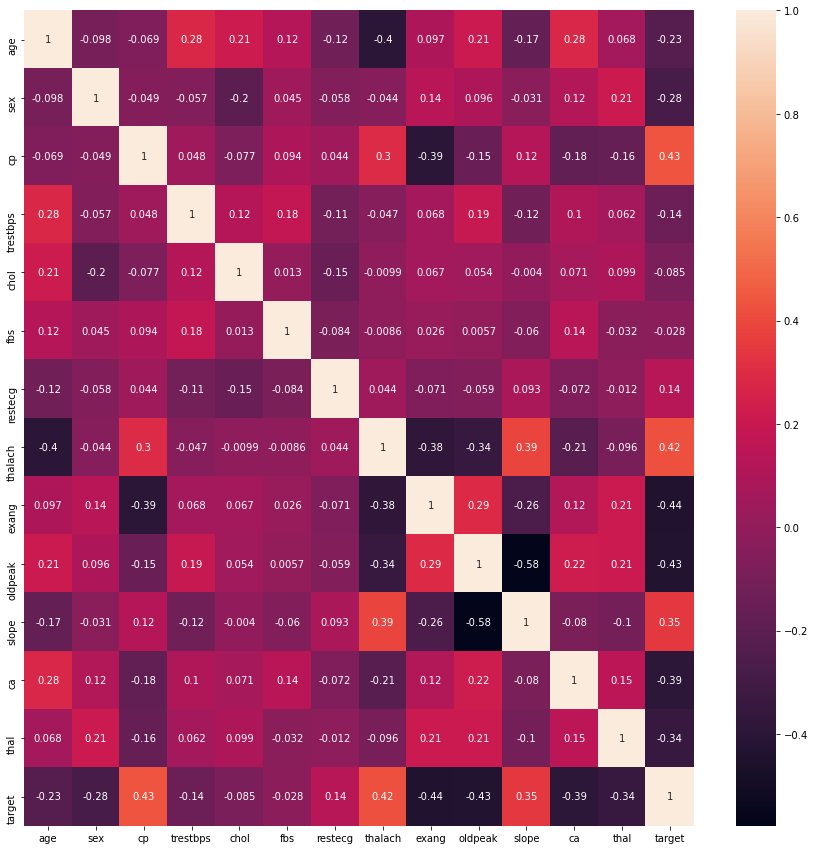

In [7]:
# let's see how each feature is correlated

correlated = heart.corr()
correlated_features = correlated.index
plt.figure(figsize=(15,15))
sns.heatmap(heart[correlated_features].corr(),annot=True)

<AxesSubplot:xlabel='target', ylabel='count'>

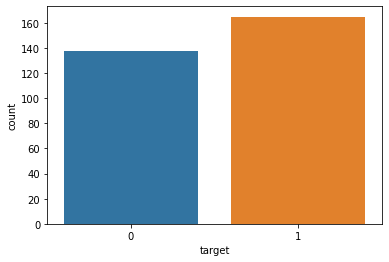

In [10]:
# is the dataset balanced?

sns.countplot(x='target',data=heart)

# Standardize the Variables

In [11]:
# import libraries

from sklearn.preprocessing import StandardScaler

In [12]:
# create StandardScaler()

scaler = StandardScaler()

In [13]:
scaler.fit(heart.drop('target', axis=1))

StandardScaler()

In [15]:
# transform features into scaled version

features_scaled = scaler.transform(heart.drop('target',axis=1))

In [17]:
# make scaled features into data frame

heart_feat = pd.DataFrame(features_scaled,columns=heart.columns[:-1])
heart_feat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


# Train Test Split

In [18]:
# let's split data into training and testing set

In [19]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled,heart['target'],test_size=.30)

# K Nearest Neighbors

In [25]:
# import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

In [26]:
# create KNN Model Instance

knn = KNeighborsClassifier(n_neighbors=1)

In [27]:
# fit KNN model to training data

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions

In [29]:
# prediction method to predict values with X_test

prediction = knn.predict(X_test)

In [31]:
# imports
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
# print confusion matrix

print(confusion_matrix(y_test,prediction))

[[29 18]
 [ 9 35]]


In [36]:
# print classification report

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68        47
           1       0.66      0.80      0.72        44

    accuracy                           0.70        91
   macro avg       0.71      0.71      0.70        91
weighted avg       0.71      0.70      0.70        91



# Finding a better K Value

In [37]:
# let's compare error_rate

# empty array for error_rate
error_rate = []

# loop keeps track of error_rate depending on k value
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

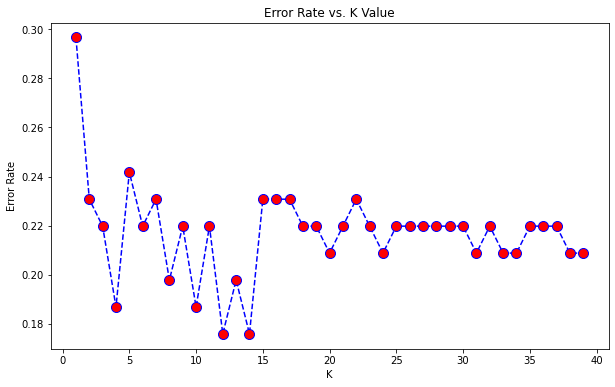

In [38]:
# let's plot the results of the loop above

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Retrain Model with Optimal K Value

In [53]:
# NOW WITH K= 13
knn = KNeighborsClassifier(n_neighbors= 13)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=13')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=13


[[31 16]
 [ 2 42]]


              precision    recall  f1-score   support

           0       0.94      0.66      0.78        47
           1       0.72      0.95      0.82        44

    accuracy                           0.80        91
   macro avg       0.83      0.81      0.80        91
weighted avg       0.84      0.80      0.80        91



We managed to improve our precision from 76% to 94% by finding the optimal K Value using the elbow method and apply it to the K Nearest Neighbor Algorithim.